# Drawing Conclusions Example
Let's address a question we posed with this cancer data earlier in the lesson - does the size of a tumor affect its malignancy? We can use descriptive statistics and visualizations to help us.

In [1]:
import pandas as pd

df = pd.read_csv('cancer_data_edited.csv')
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809


# Selecting Data with Masks
In order to do this analysis, we'd ideally compare sizes of tumors that are benign and malignant. We can use __masks__ to select all rows in the dataframe that were diagnosed as malignant.

In [2]:
# Create new dataframe with only malignant tumors
df_m = df[df['diagnosis'] == 'M']
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809


Let's break down how we got `df_m`.

`df['diagnosis'] == 'M'` returns a Pandas Series of booleans indicating whether the value in the `diagnosis` columns is equal to `M`.

In [3]:
mask = df['diagnosis'] == 'M'
print(mask)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19     False
20     False
21     False
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
534    False
535    False
536    False
537    False
538    False
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557     True
558     True
559     True
560     True
561     True
562     True
563    False
Name: diagnosis, Length: 564, dtype: bool


And indexing the dataframe with this mask will return all rows where the value in `mask` is True (ie. where `diagnosis == 'M'`).

In [4]:
df_m = df[mask]
df_m

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.30010,0.14710,0.241900
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.181200
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.206900
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.24140,0.10520,0.259700
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.180900
5,843786,M,12.45,15.700000,82.57,477.1,0.127800,0.17000,0.15780,0.08089,0.208700
6,844359,M,18.25,19.980000,119.60,1040.0,0.094630,0.10900,0.11270,0.07400,0.181091
7,84458202,M,13.71,20.830000,90.20,577.9,0.118900,0.16450,0.09366,0.05985,0.219600
8,844981,M,13.00,21.820000,87.50,519.8,0.127300,0.19320,0.18590,0.09353,0.235000
9,84501001,M,12.46,24.040000,83.97,475.9,0.118600,0.23960,0.22730,0.08543,0.203000


Now that we have all the malignant tumors together in a dataframe, let's see summary statistics about the `area` feature, which offers a good metric for size.

In [5]:
# Display summary statistics for area of malignant tumors
df_m['area'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

Let's do the same for all the benign tumors.

In [6]:
# Create new dataframe with only benign tumors
df_b = df[df['diagnosis'] == 'B']

# Display summary statistics for area of benign tumors
df_b['area'].describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

In [7]:
print('The mean area of malignant tumors is {0:.4f} while that of benign \
tumors is {1:.4f}.'.format(df_m['area'].mean(), df_b['area'].mean()))

The mean area of malignant tumors is 976.5829 while that of benign tumors is 462.7124.


Although summary statistics like the mean are helpful, it would be nice to be able to compare the distributions of the areas of malignant and benign tumors visually. Let's see a simple example of using matplotlib to create histograms for both distributions on the same plot.

(We'll learn how to use matplotlib in the next lesson.)

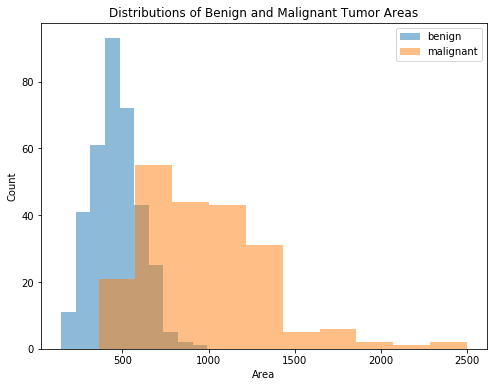

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

# Plot histogram of benign and malignant tumor areas on the same axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area'], alpha=0.5, label='benign')
ax.hist(df_m['area'], alpha=0.5, label='malignant')
ax.set_title('Distributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

The visual above suggests that there is a difference between the distribution of areas for benign and malignant tumors. We don't yet have the tools to conclude that these distributions are different or whether the size definitely affects a tumor's malignancy. However, we can observe from summary statistics and these histograms that malignant tumors are generally larger in size than benign tumors.